# IMPORT

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from pandas_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from preprocess import preprocess
from preprocess import normalize
from sklearn_pandas import DataFrameMapper
import sqlite3 as sq
import os
%matplotlib inline

In [2]:
df = pd.read_csv('../data/profiles_revised.csv')
df.columns = df.columns.str.replace('\t', '') # needed?
origin = df.columns

In [3]:
def print_col_values(list, filename):
    with open(r'{}.txt'.format(filename), 'w') as fp:
        for element in list:
            fp.write("{}\n".format(element))

In [4]:
def df_distinct_values(df, folder):
    if not os.path.exists(folder):
        os.makedirs('./exploration/'+folder)
    for (index, colname) in enumerate(df.columns):
        #print(index, colname)
        distinc_values = df[colname].unique()
        print_col_values(list=distinc_values, filename='./exploration/{}/{}-{}-values'.format(folder, index, colname))

In [5]:
df_distinct_values(df=df, folder='origin')

In [6]:
#profile = ProfileReport(df, title='Pandas Profilign Report')
#profile.to_notebook_iframe()
#profile.to_file('./exploration/pandas_profiling_data_report.html')

# CLEAN

In [7]:
#df = df[['age', 'body_type']]
df_clean = preprocess(df.columns, df)

In [8]:
# TODO: fix '\'
#df_distinct_values(df=df_clean, folder='cleaned')

# SAVE

In [9]:
df_clean.to_csv('./data/cleaned.csv')

In [10]:
#table_name = 'okcupid_clean'
#table_path = './data/'+ table_name +'_db'
#conn = sq.connect('{}.sqlite'.format(table_path)) # creates file
#df_clean.to_sql(table_path, conn, if_exists='replace', index=False) # writes to file
#conn.close() # good practice: close connection

# STANDARDIZE

In [11]:
df_clean.head()
sample = df_clean.iloc[:1]

In [12]:
normalize(df)

test


In [13]:
continuous_cols = ['age', 'height']
categorical_cols = ['body_type', 'drinks', 'drugs', 'income', 'job', 'orientation', 'sex', 'smokes',
'diet','diet_modifier',
'education_status', 'education_institution',
'offspring_status', 'offspring_future',
'pets_cats', 'pets_dogs',
'religion_type', 'religion_modifier',
'sign', 'sign_modifier']
ethnities_cols = df_clean[df_clean.columns[pd.Series(df_clean.columns).str.startswith('ethnicities')]].columns
speaks_cols = df_clean[df_clean.columns[pd.Series(df_clean.columns).str.startswith('speaks')]].columns

In [14]:
# Example
mapper = DataFrameMapper([
  ('body_type', LabelEncoder()),
  (['age'], StandardScaler())],
  #[(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols],
  df_out=True 
)
print(mapper)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[('body_type', LabelEncoder()),
                          (['age'], StandardScaler())])


In [15]:
# Mapper for checking
mapper = DataFrameMapper([
  #('drinks', LabelEncoder()),
  (['age'], StandardScaler())] +
  [(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols],
  df_out=True 
)
print(mapper)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['age'], StandardScaler()),
                          ('body_type', LabelBinarizer()),
                          ('drinks', LabelBinarizer()),
                          ('drugs', LabelBinarizer()),
                          ('income', LabelBinarizer()),
                          ('job', LabelBinarizer()),
                          ('orientation', LabelBinarizer()),
                          ('sex', LabelBinarizer()),
                          ('smokes', LabelBinarizer()),
                          ('diet', LabelBinarizer()),
                          ('diet_modifier', Labe...
                          ('education_status', LabelBinarizer()),
                          ('education_institution', LabelBinarizer()),
                          ('offspring_status', LabelBinarizer()),
                          ('offspring_future', LabelBinarizer()),
                          ('pets_cats', LabelBinarizer()),
                   

In [16]:
# Real mapper
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in continuous_cols] +
  [(categorical_col, LabelEncoder()) for categorical_col in categorical_cols] +
  [(ethnities_col, LabelEncoder()) for ethnities_col in ethnities_cols] +
  [(speaks_col, LabelEncoder()) for speaks_col in speaks_cols],
  df_out=True 
)
mapper

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['age'], StandardScaler()),
                          (['height'], StandardScaler()),
                          ('body_type', LabelEncoder()),
                          ('drinks', LabelEncoder()), ('drugs', LabelEncoder()),
                          ('income', LabelEncoder()), ('job', LabelEncoder()),
                          ('orientation', LabelEncoder()),
                          ('sex', LabelEncoder()), ('smokes', LabelEncoder()),
                          ('diet', LabelEncoder()),
                          ('diet_mo...
                          ('sign_modifier', LabelEncoder()),
                          ('ethnicities_middle_eastern', LabelEncoder()),
                          ('ethnicities_hispanic_/_latin', LabelEncoder()),
                          ('ethnicities_white', LabelEncoder()),
                          ('ethnicities_indian', LabelEncoder()),
                          ('ethnicities_other', LabelEncoder()),
                          ('ethnicities_asian', LabelEncoder()),
                          ('ethnicities_black', LabelEncoder()),
                          ('ethnicities_native_american', LabelEncoder()), ...])

In [17]:
df_std = np.round(mapper.fit_transform(df_clean.copy()),2)

In [18]:
#table_name = 'okcupid_std'
#table_path = './data/'+ table_name +'_db'
#conn = sq.connect('{}.sqlite'.format(table_path)) # creates file
#std_df.to_sql(table_path, conn, if_exists='replace', index=False) # writes to file
#conn.close() # good practice: close connection

In [19]:
table_names = ['okcupid_clean', 'okcupid_std']
#table_path = './data/'+ table_name +'_db'

dfs = {
    "std_clean": df_clean,
    "dt_std": df_std,
}

with sq.connect("okcupid.sqlite") as db:
    df_clean.to_sql('okcupid_clean', db, if_exists="replace", index=False)
    df_std.to_sql('okcupid_std', db, if_exists="replace", index=False)

In [20]:
sample

,age,body_type,diet,drinks,drugs,height,income,job,orientation,sex,...,speaks_welsh,speaks_sign_language,speaks_khmer,speaks_cebuano,speaks_afrikaans,speaks_albanian,speaks_romanian,speaks_polish,speaks_turkish,speaks_finnish
1,36,average,other,often,sometimes,70.0,80000.0,hospitality / travel,straight,m,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#sample = pd.DataFrame({'age': [30], 'body_type': ['fit']})
#np.round(mapper.transform(sample), 2)

In [22]:
np.round(mapper.transform(sample), 2)

,age,height,body_type,drinks,drugs,income,job,orientation,sex,smokes,...,speaks_welsh,speaks_sign_language,speaks_khmer,speaks_cebuano,speaks_afrikaans,speaks_albanian,speaks_romanian,speaks_polish,speaks_turkish,speaks_finnish
1,0.49,0.33,2,2,2,6,8,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/43554821/feature-preprocessing-of-both-continuous-and-categorical-variables-of-integer-t
# https://stackoverflow.com/questions/53152627/saving-standardscaler-model-for-use-on-new-datasets?noredirect=1&lq=1
# https://stackoverflow.com/questions/38780302/predicting-new-data-using-sklearn-after-standardizing-the-training-data

# RESULT

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10704\3526068180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, annot=True)


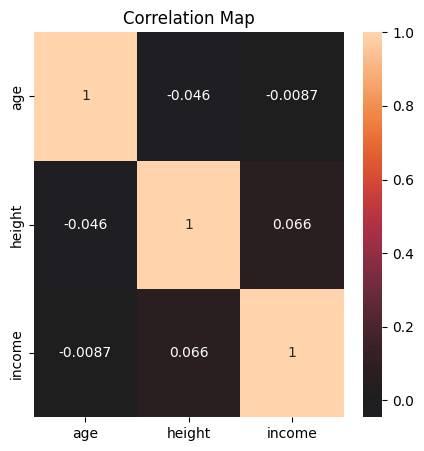

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title('Correlation Map')
plt.show()
plt.savefig('./exploration/correlation-map.png')

KeyError: 'lables'

<Figure size 500x500 with 0 Axes>

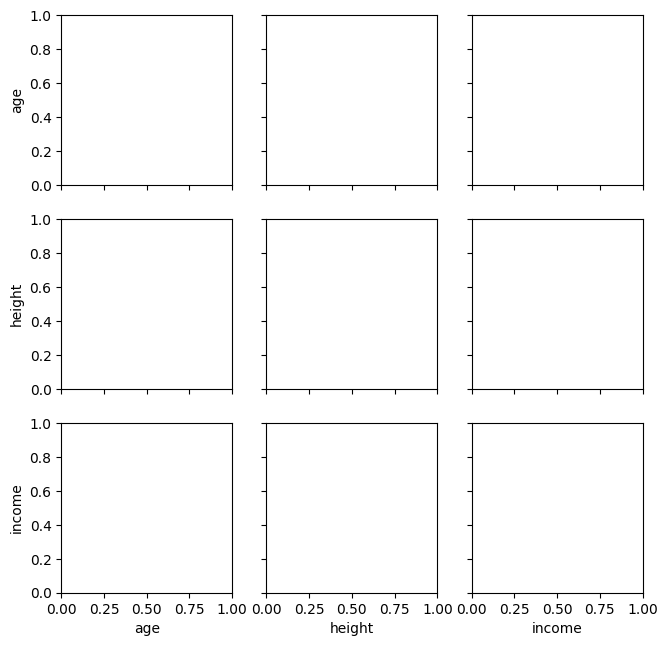

In [25]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df, hue='lables', palette='RdBu')
plt.title('Correlation Map')
plt.show()
plt.savefig('./exploration/pairplot.png')